### Riskwatch Charts

- Target report release date of 18/04

TODO: Rerun script with updated dataset with replaced renewables capacity col

In [34]:
# package imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import *
plotly.offline.init_notebook_mode(connected=True)

from IPython.display import display # Nicer print outputs
plt.style.use('fivethirtyeight')
pd.set_option('mode.chained_assignment', None) # Ignores SettingWithCopy warning


# display full output in Jupyter Notebook
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### Update and reuse from base RE_RiskIndex04.04.xlsx

- create update RW2023.xlsx from that

In [35]:
# import data
path = %pwd
# filters out filetypes in current directory
rw_sheet = [f for f in os.listdir(path) if f.endswith('.xlsx')]
print(path, '\n', rw_sheet, '\n')

c:\Users\Ash\OneDrive - Inspiratia\Projects\tests\riskwatch_owid\rw2023_charts 
 ['RW_2023dataset04.04.xlsx', 'RW_2023datset_CC04.04.xlsx'] 



### Riskwatch dataset
- Heatmap
- 2 radar charts
    - top 5 and bottom 5 countries

- tables per subcategory + overall table (top 10)
- Basic charts on subcategories + overall (top 10)

In [39]:
# Remember not to have the xlsx file open
df_rw = pd.read_excel(path + '/' + rw_sheet[0], sheet_name='Europe_04.04')
df_rw.head()

,Country,Region,R&D Spending,Score1,Business Freedom,Score2,Transition Readiness,Score3,PPA Capacity,Score4,...,Renewables Investment,Score25,Electricity Exports,Score26,Electricity Investment per capita,Score27,T&D Losses,Score28,IO Score,Overall Score
0,Netherlands,Europe,NaN,NaN,88.1,86.6,65.6,56.6,1178.5,82.3,...,1189.3859,27.5,0.0,95.6,286.552721,91.6,7.059699,50.0,66.175000,76.948810
1,Denmark,Europe,0.506,68.7,89.0,93.3,78.2,100.0,283.0,41.1,...,114535.4314,96.5,-37.0,39.1,NaN,NaN,5.284016,20.0,51.866667,75.380952
2,Sweden,Europe,0.515,75.0,84.6,70.0,72.7,86.6,219.2,35.2,...,14836.1557,62.0,-127.0,13.0,NaN,NaN,5.285046,23.3,32.766667,70.198810
3,Finland,Europe,NaN,NaN,88.7,90.0,73.0,90.0,777.7,70.5,...,7983.6491,51.7,-14.0,60.8,NaN,NaN,3.083133,6.6,39.700000,66.878571
4,United Kingdom,Europe,0.455,56.2,79.1,43.3,69.2,76.6,2125.8,94.1,...,222460.0351,100.0,-12.0,69.5,179.925125,41.6,7.428875,66.6,69.425000,65.750000


### Capacity Charts

- Renewables Capacity (MW)
- PPA Capacity (MW)
- RE Generation per capita (KWh)
- RE Consumption per capita (KWh)

bar for top + bottom 5 (exc.nulls)

In [43]:
energy = df_rw[['Country', 'Renewables Capacity (MW)', 'PPA Capacity',
                  'RE Generation per capita', 'RE Consumption per capita']]

In [44]:
energy.head()

,Country,Renewables Capacity (MW),PPA Capacity,RE Generation per capita,RE Consumption per capita
0,Netherlands,22953.655,1178.5,6832.718,18325.025
1,Denmark,10339.615,283.0,4458.303,12506.809
2,Sweden,34524.900,219.2,11057.510,30865.164
3,Finland,9629.000,777.7,6837.088,20123.209
4,United Kingdom,50292.999,2125.8,1816.262,5319.537


In [45]:
energy.columns = ['Country', 'Renewables Capacity 2022 (GW)', 'PPA Capacity 2022 (MW)',
                  'RE Generation Per Capita 2021 (MWh)', 'RE Consumption Per Capita 2021 (MWh)']

In [46]:
energy['Renewables Capacity 2022 (GW)'] = energy['Renewables Capacity 2022 (GW)'].apply(lambda x: x * 0.001)
energy['RE Generation Per Capita 2021 (MWh)'] = energy['RE Generation Per Capita 2021 (MWh)'].apply(lambda x: x * 0.001)
energy['RE Consumption Per Capita 2021 (MWh)'] = energy['RE Consumption Per Capita 2021 (MWh)'].apply(lambda x: x * 0.001)

### Note: Records with null values removed for the below bar charts
- This means that some countries in the dataset will be ignored entirely

In [47]:
energy = energy.dropna()

In [48]:
energy.set_index('Country', inplace=True)

,Renewables Capacity 2022 (GW)
Country,
Germany,138.15
Spain,61.52
France,59.55
Italy,56.99
United Kingdom,50.29


,Renewables Capacity 2022 (GW)
Country,
Denmark,10.34
Finland,9.63
Ireland,4.81
Croatia,3.45
Estonia,0.99


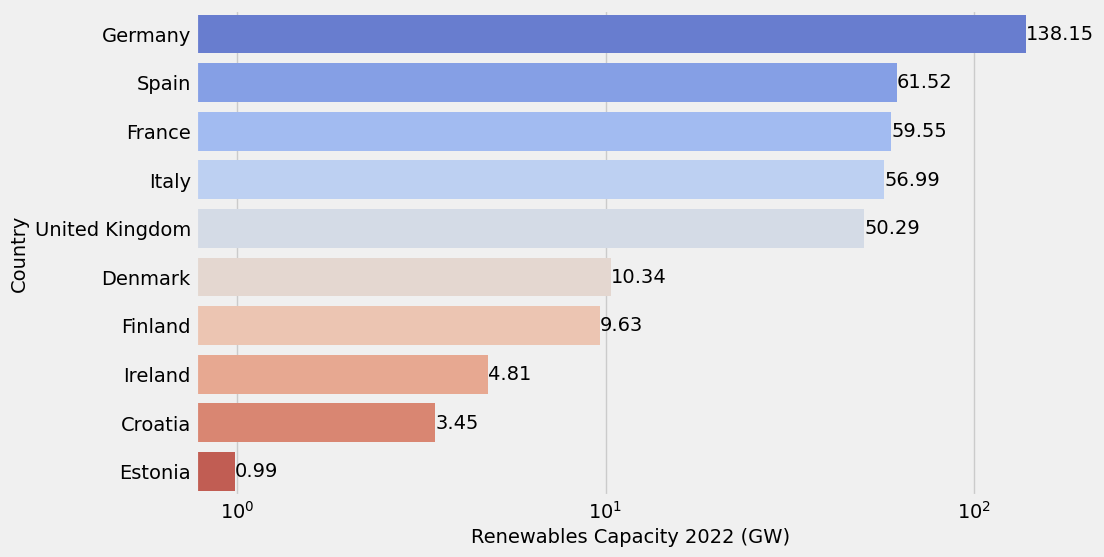

,PPA Capacity 2022 (MW)
Country,
Spain,3112.30
United Kingdom,2125.80
Germany,1615.13
Netherlands,1178.50
Poland,1155.80


,PPA Capacity 2022 (MW)
Country,
Estonia,99.0
Portugal,98.0
Ireland,61.3
Croatia,46.0
Austria,5.5


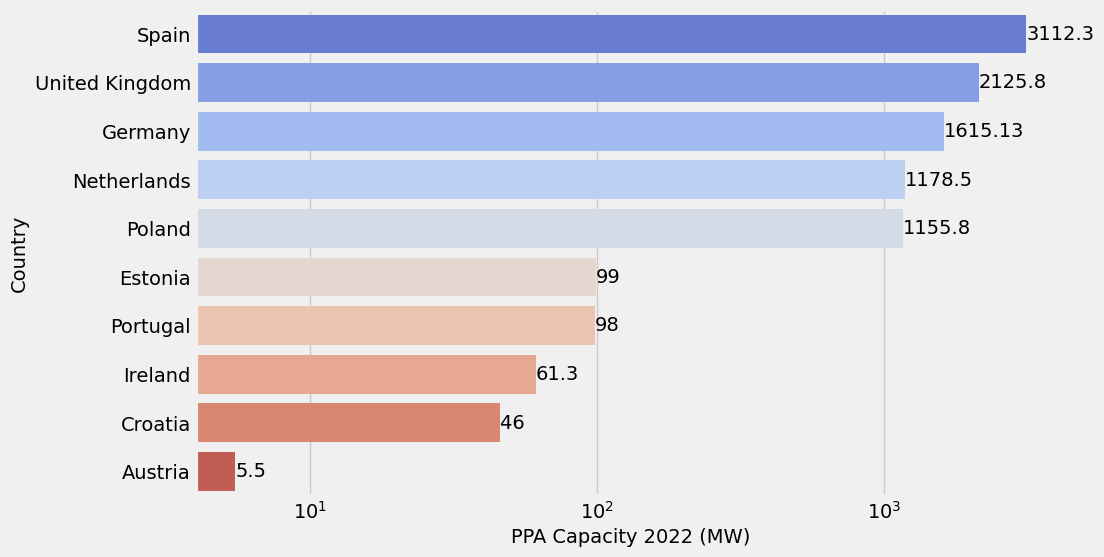

,RE Generation Per Capita 2021 (MWh)
Country,
Sweden,11.06
Finland,6.84
Netherlands,6.83
Austria,5.91
Denmark,4.46


,RE Generation Per Capita 2021 (MWh)
Country,
Italy,1.96
France,1.90
United Kingdom,1.82
Portugal,1.36
Norway,0.04


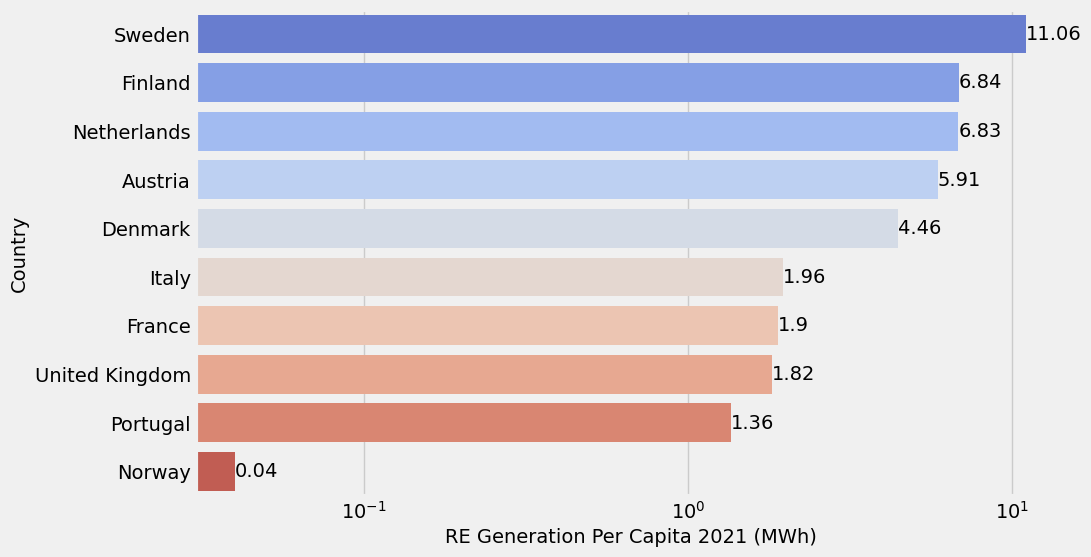

,RE Consumption Per Capita 2021 (MWh)
Country,
Norway,75.24
Sweden,30.87
Finland,20.12
Netherlands,18.33
Austria,17.30


,RE Consumption Per Capita 2021 (MWh)
Country,
France,5.54
Italy,5.47
Greece,5.43
United Kingdom,5.32
Poland,2.50


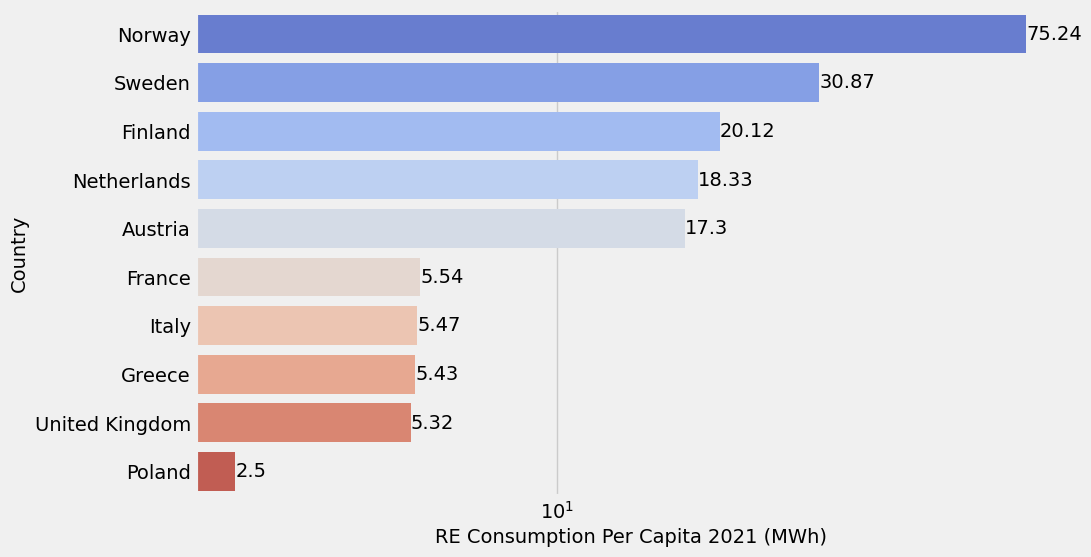

In [49]:
for col_name in energy.columns:
        
        col = energy[[col_name]].round(2).sort_values(by=col_name, ascending=False)
        head = col.head(5)
        tail = col.tail(5)
        head_and_tail = pd.concat([head, tail], axis=0)
        display(head)
        print('\n')
        display(tail)

        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=head_and_tail, x=col_name, y=head_and_tail.index,palette='coolwarm')
        plt.xscale('log')
        ax.bar_label(ax.containers[0])
        plt.show()

### Subcategory charts

In [50]:
rw_categories = df_rw[['Country', 'PS Score', 'MO Score',
                       'IS Score', 'MS Score', 'LF Score',
                       'FE Score', 'IO Score', 'Overall Score']]

In [51]:
# Rename cols for clarity
rw_categories.columns = ['Country', 'Policy Support Score', 'Market Outlook Score',
                         'Institutional Stability Score', 'Market Size Score', 'Legal Framework Score',
                         'Financing Environment Score', 'Investment Openess Score', 'Overall Score']

In [52]:
rw_categories.sort_values(by="Overall Score", ascending=False, inplace=True)

In [53]:
# Round values for clarity
display(rw_categories.round(2).head())
print('\n')
display(rw_categories.round(2).tail())

,Country,Policy Support Score,Market Outlook Score,Institutional Stability Score,Market Size Score,Legal Framework Score,Financing Environment Score,Investment Openess Score,Overall Score
0,Netherlands,75.17,49.15,97.45,86.45,86.65,77.60,66.18,76.95
1,Denmark,75.78,65.80,89.98,77.10,80.80,86.35,51.87,75.38
2,Sweden,66.70,72.45,84.15,89.90,58.28,87.15,32.77,70.20
3,Finland,83.50,48.30,88.30,75.68,52.45,80.22,39.70,66.88
4,United Kingdom,67.55,61.62,62.45,53.90,68.28,77.03,69.42,65.75


,Country,Policy Support Score,Market Outlook Score,Institutional Stability Score,Market Size Score,Legal Framework Score,Financing Environment Score,Investment Openess Score,Overall Score
26,Cyprus,19.95,43.30,31.65,11.07,30.82,35.45,61.10,33.33
27,Bulgaria,15.00,42.48,13.30,31.20,43.30,16.67,64.20,32.31
28,Hungary,39.97,39.15,24.12,17.50,22.45,19.92,46.13,29.89
29,Greece,13.10,20.80,19.15,47.28,20.80,20.20,61.83,29.02
30,Slovenia,23.30,22.48,6.63,8.32,40.80,59.47,42.02,29.00


In [54]:
# Create top 10 tables and basic visuals per column

def rank_n_chart(df, index_col, x_col='Country', num=31):
    """ Create top n ranking of each col from your dataframe 
        and make basic charts from each."""
    
    # Table creation
    index_col = df.columns[index_col]
    var = df[[x_col, index_col]]
    var =  var.sort_values(by=index_col, ascending=False)[:num].round(2)
    
    # Chart formatting
    #pal = sns.color_palette("Greens_d", len(index_col))
    #palette=np.array(pal[::-1])
    plt.figure(figsize=(10, 15))
    sns.scatterplot(data=var, x=index_col, y=x_col, s=300)
    plt.show()

    var.set_index(x_col,inplace=True)
    print(display(var))
    return var

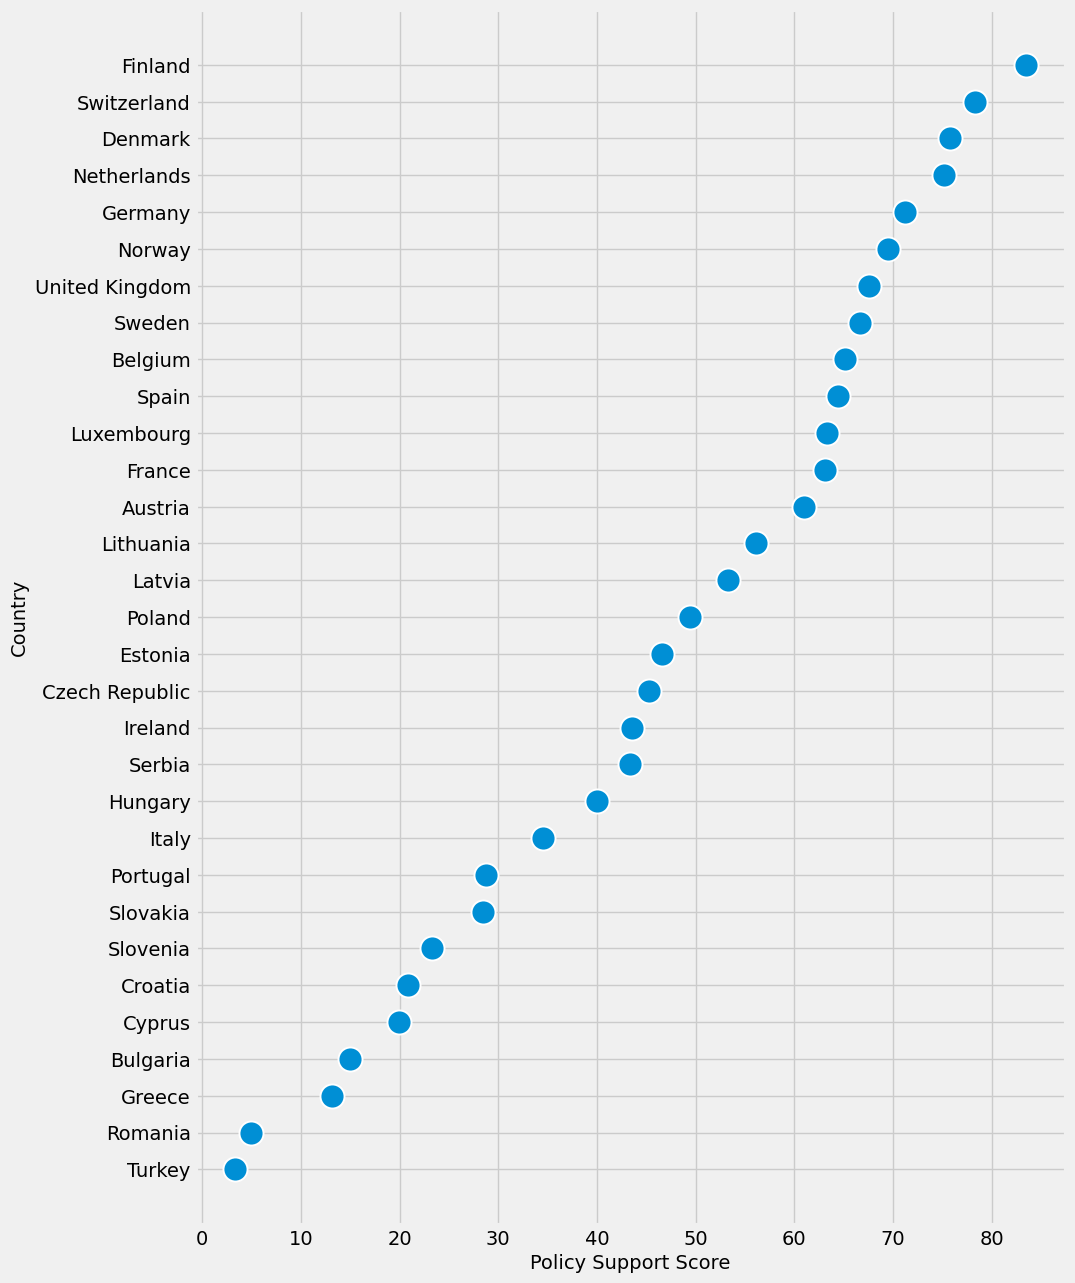

,Policy Support Score
Country,
Finland,83.50
Switzerland,78.30
Denmark,75.78
Netherlands,75.17
Germany,71.27
Norway,69.50
United Kingdom,67.55
Sweden,66.70
Belgium,65.18


None


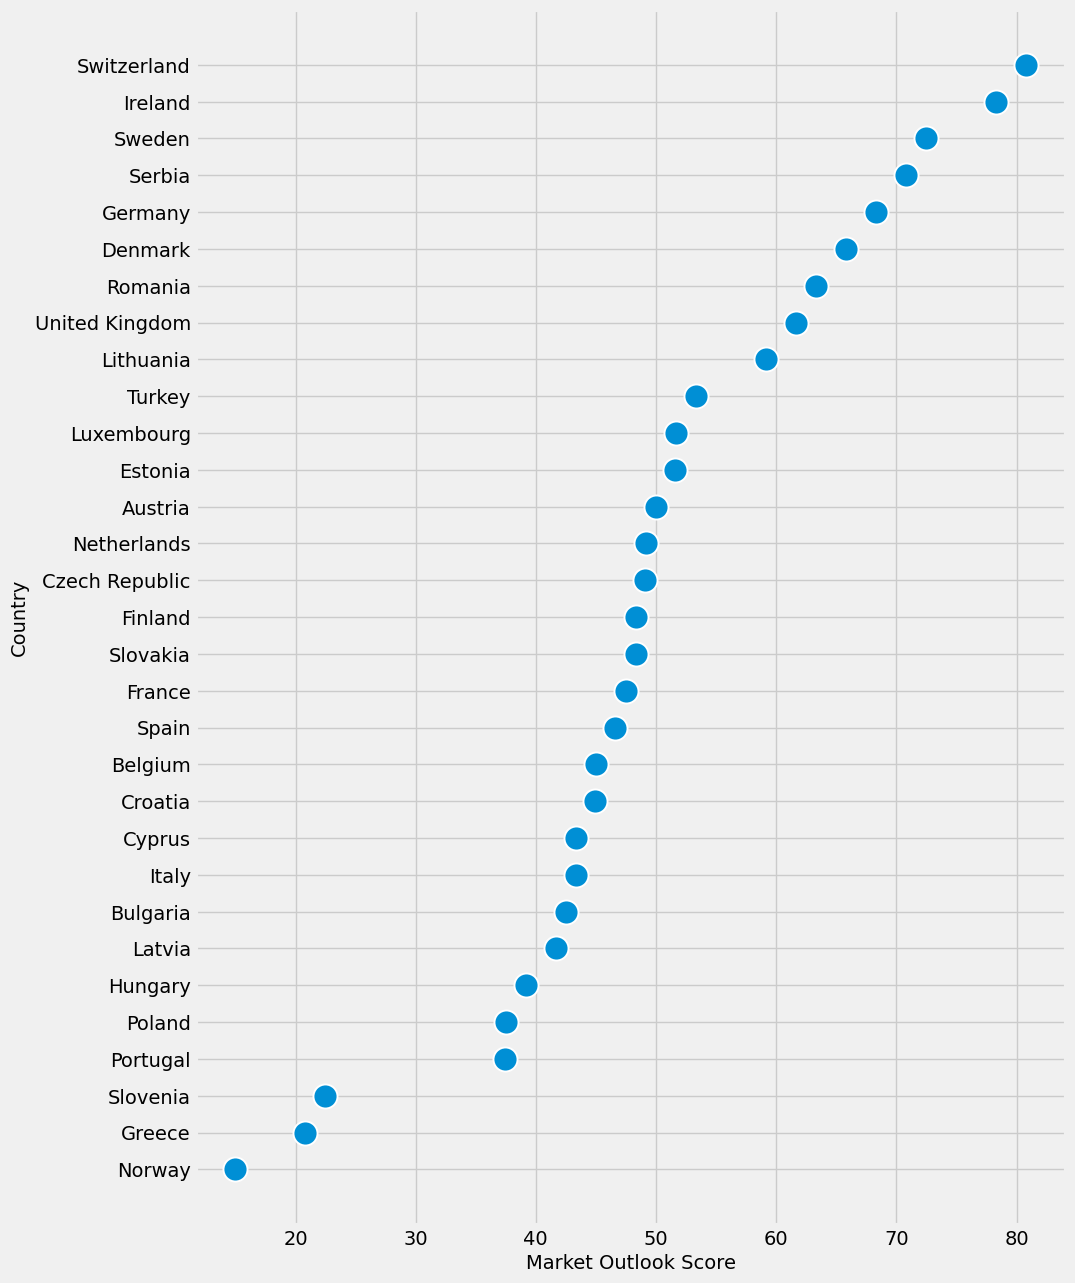

,Market Outlook Score
Country,
Switzerland,80.80
Ireland,78.28
Sweden,72.45
Serbia,70.80
Germany,68.32
Denmark,65.80
Romania,63.30
United Kingdom,61.62
Lithuania,59.12


None


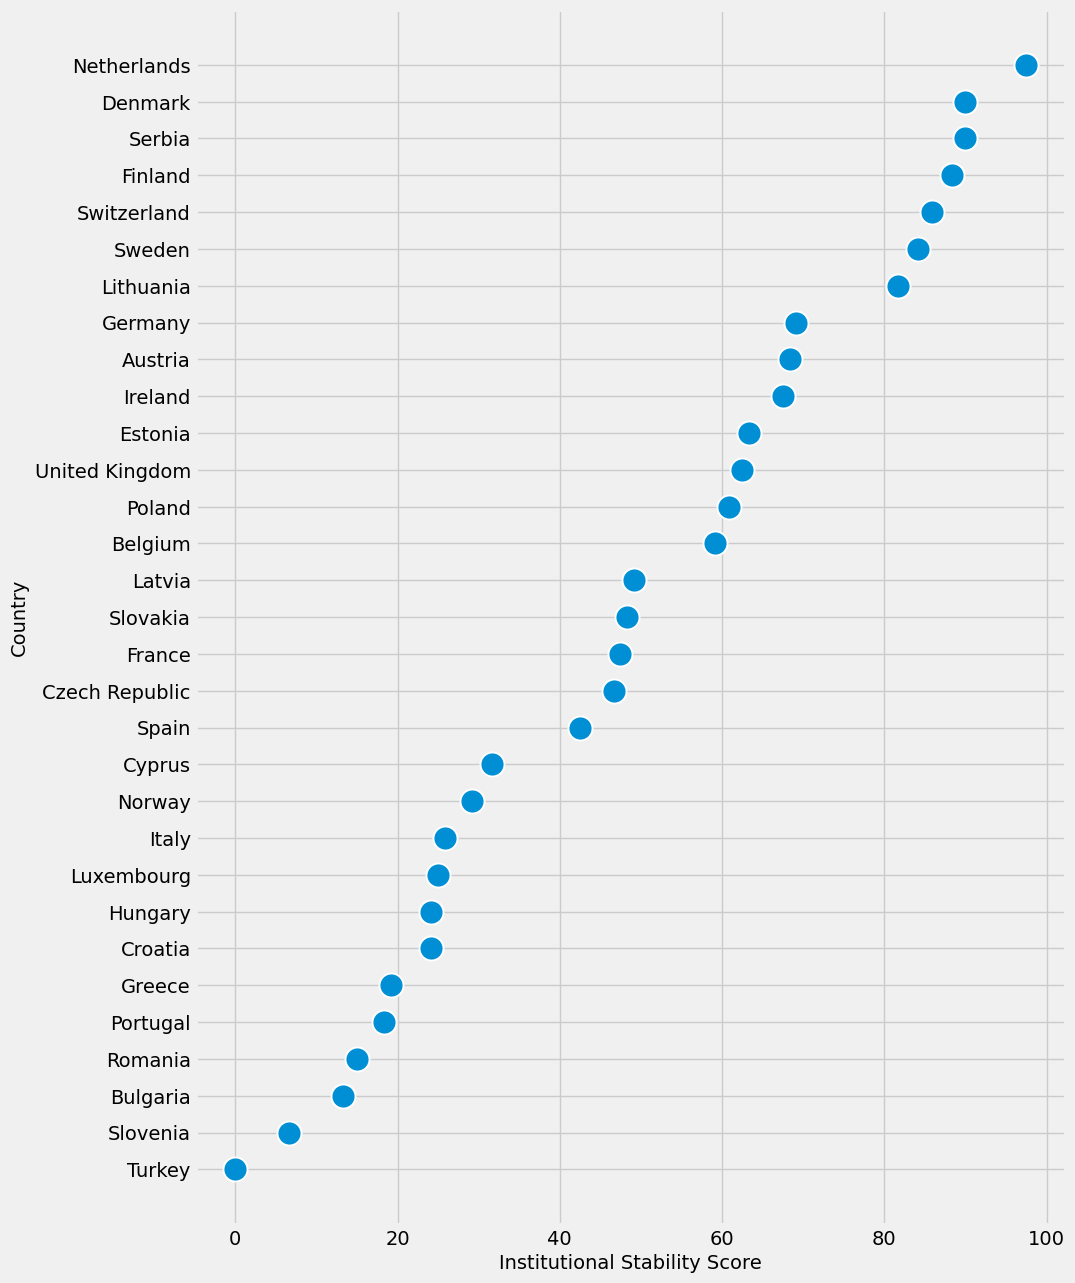

,Institutional Stability Score
Country,
Netherlands,97.45
Denmark,89.98
Serbia,89.95
Finland,88.30
Switzerland,85.80
Sweden,84.15
Lithuania,81.62
Germany,69.12
Austria,68.30


None


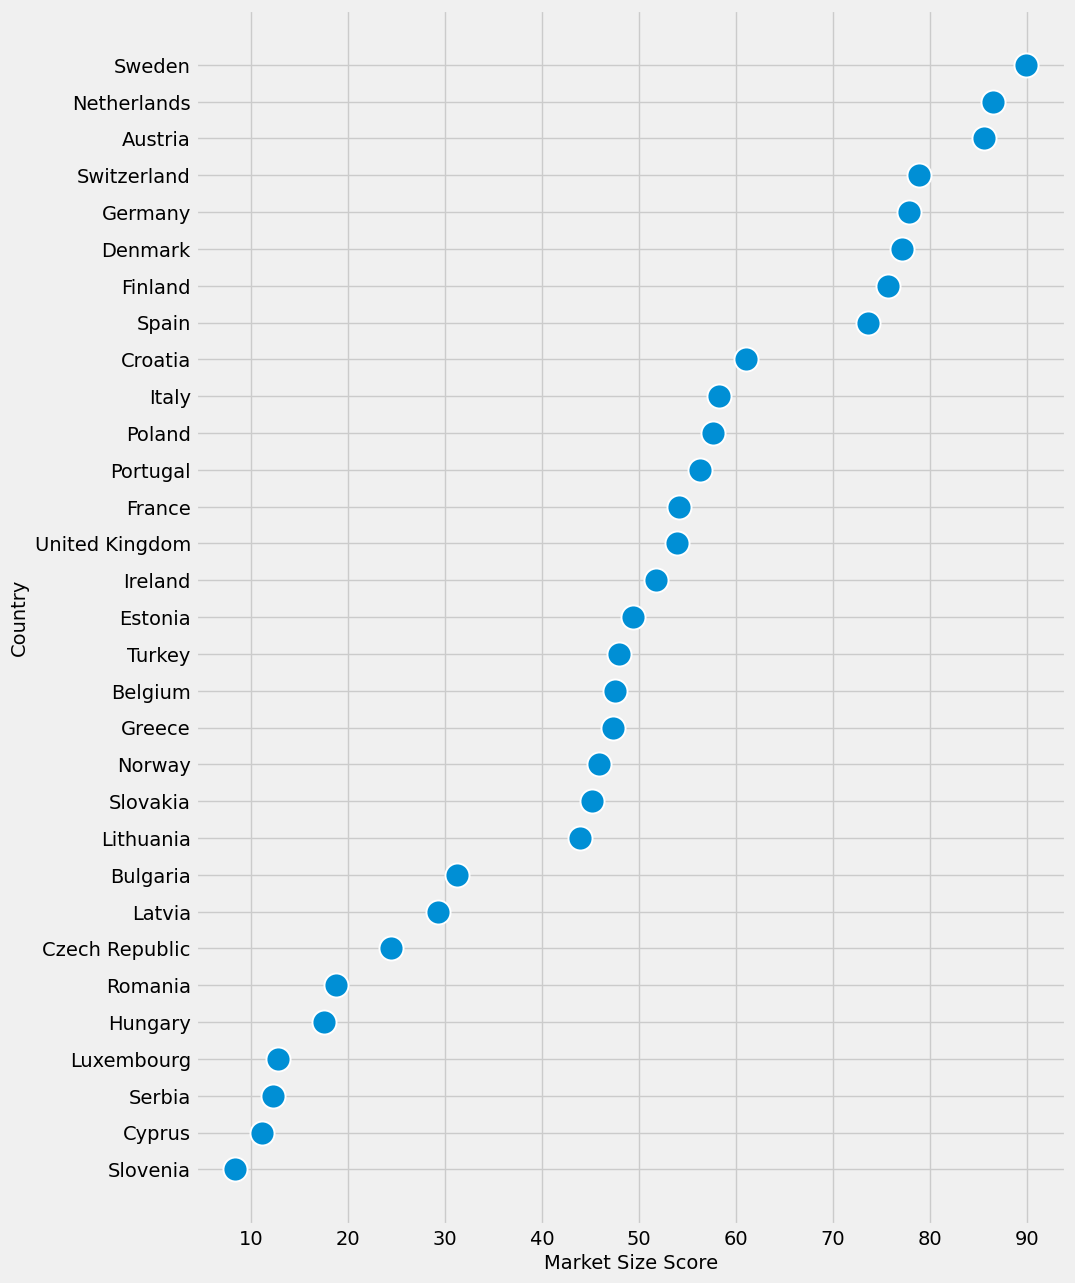

,Market Size Score
Country,
Sweden,89.90
Netherlands,86.45
Austria,85.58
Switzerland,78.82
Germany,77.82
Denmark,77.10
Finland,75.68
Spain,73.58
Croatia,61.00


None


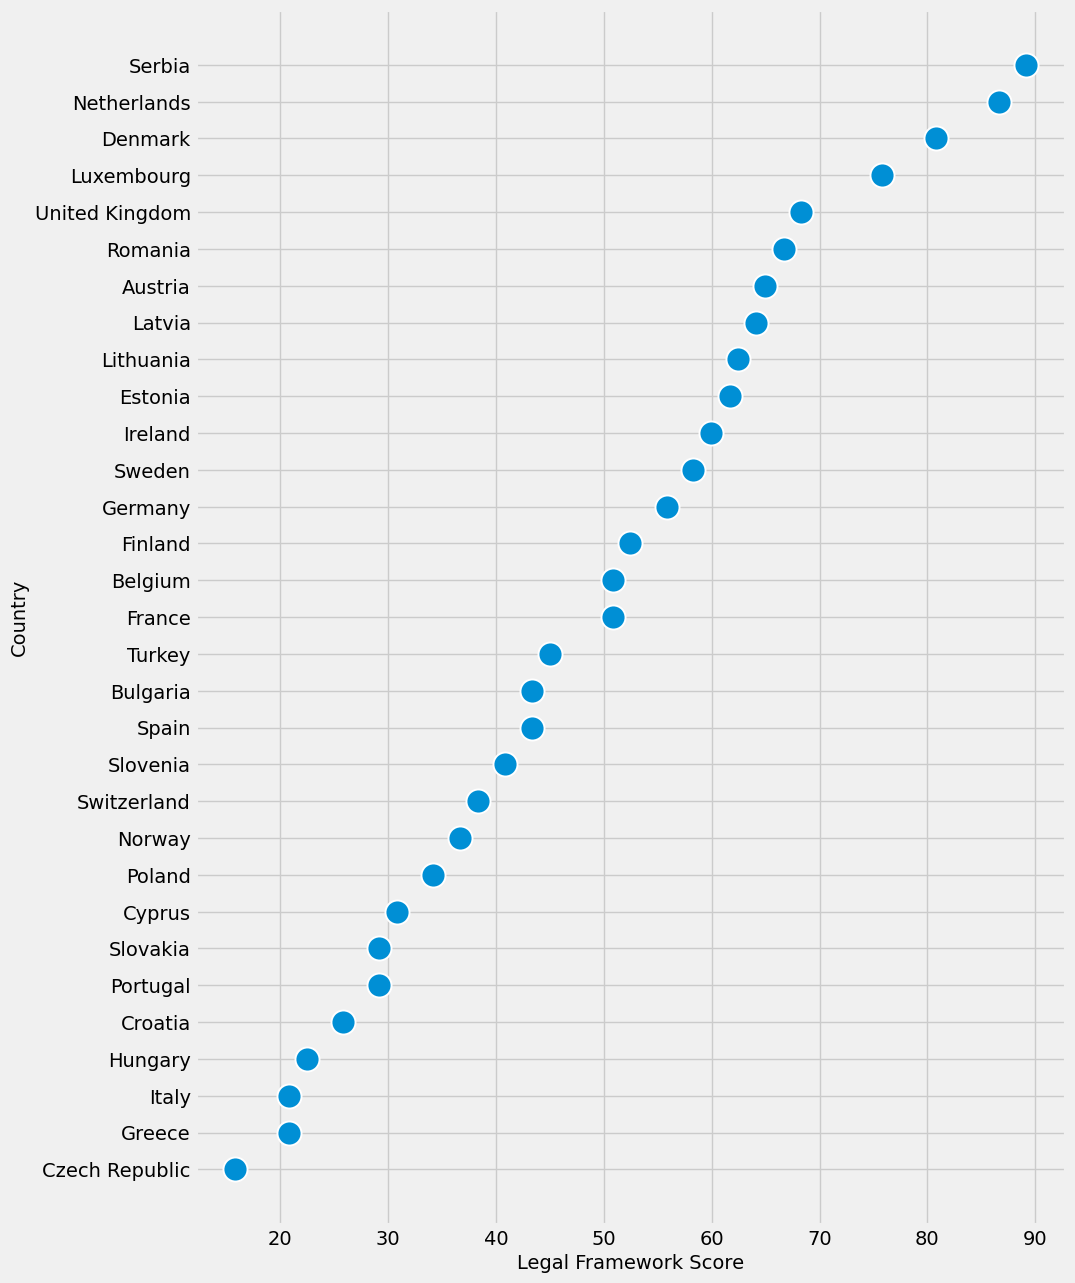

,Legal Framework Score
Country,
Serbia,89.15
Netherlands,86.65
Denmark,80.80
Luxembourg,75.82
United Kingdom,68.28
Romania,66.65
Austria,64.97
Latvia,64.12
Lithuania,62.45


None


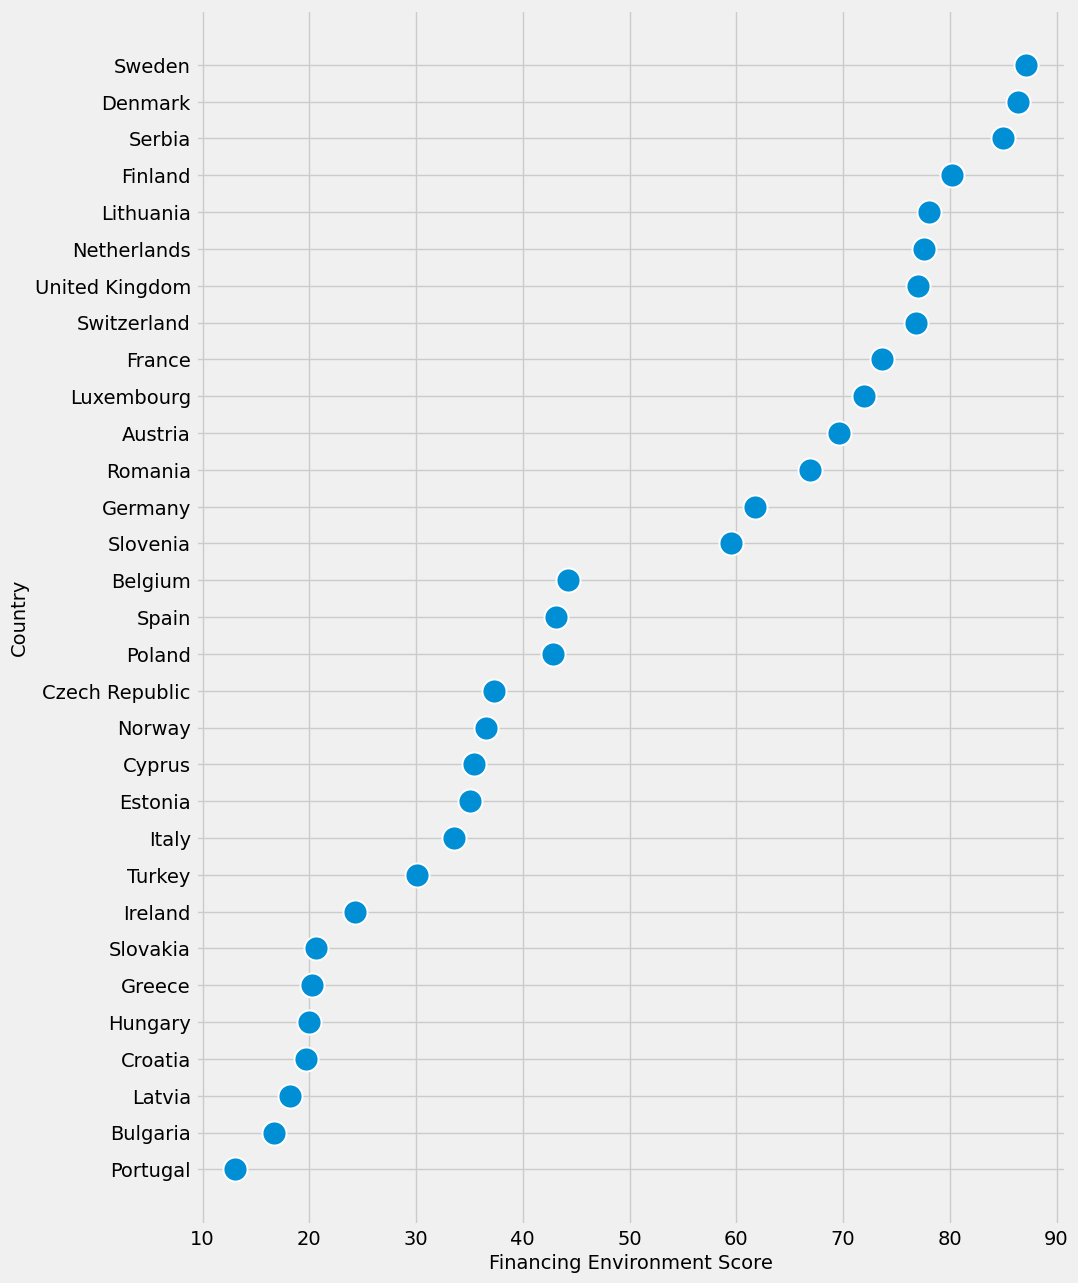

,Financing Environment Score
Country,
Sweden,87.15
Denmark,86.35
Serbia,84.95
Finland,80.22
Lithuania,78.08
Netherlands,77.60
United Kingdom,77.03
Switzerland,76.87
France,73.68


None


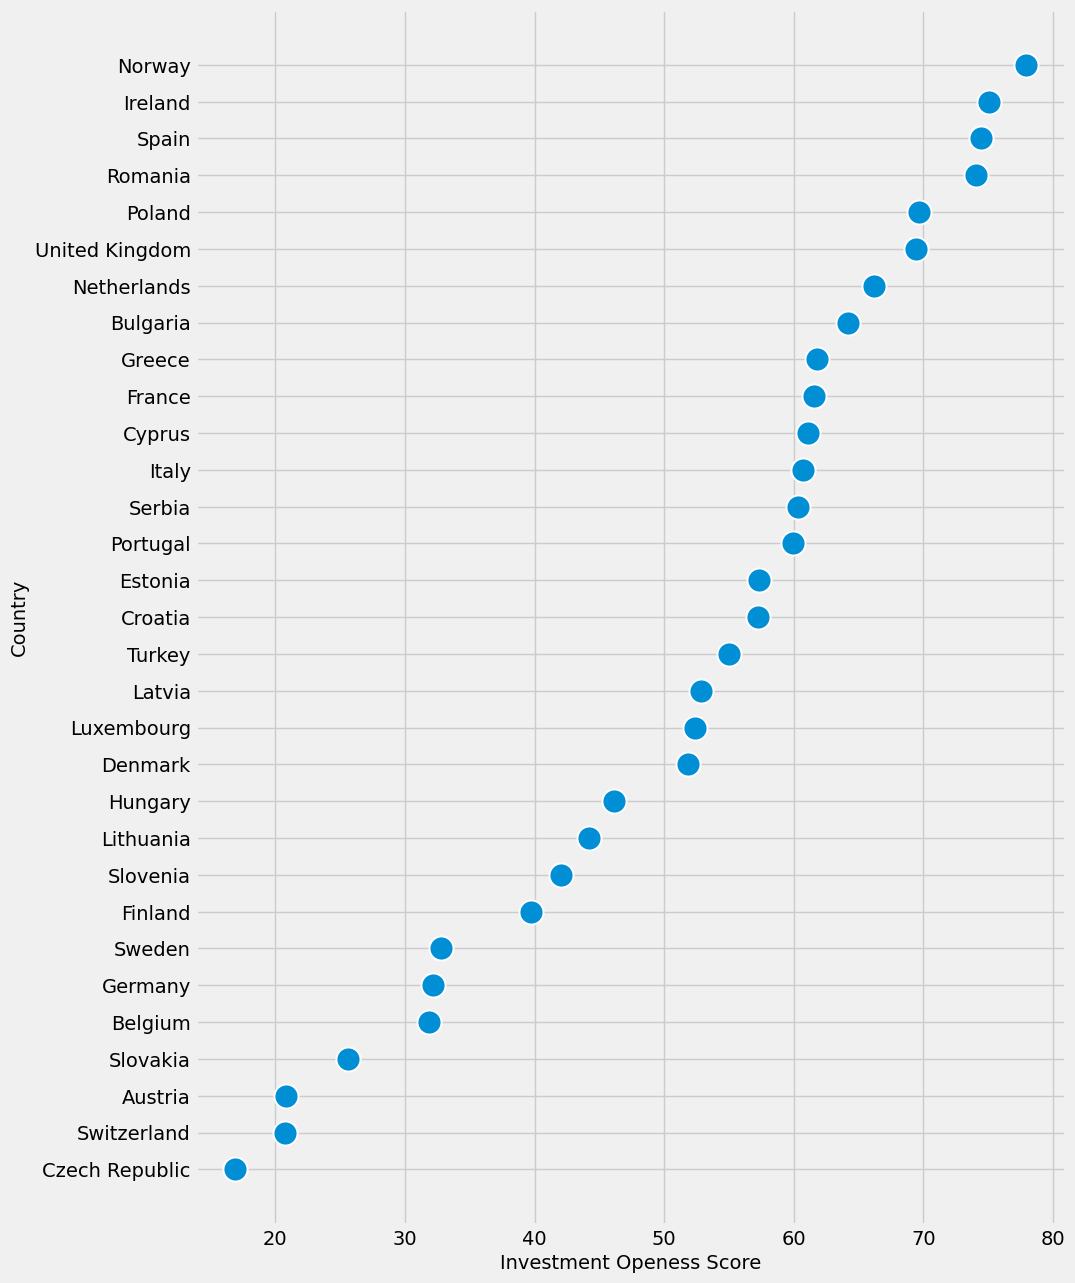

,Investment Openess Score
Country,
Norway,77.93
Ireland,75.10
Spain,74.43
Romania,74.03
Poland,69.63
United Kingdom,69.42
Netherlands,66.18
Bulgaria,64.20
Greece,61.83


None


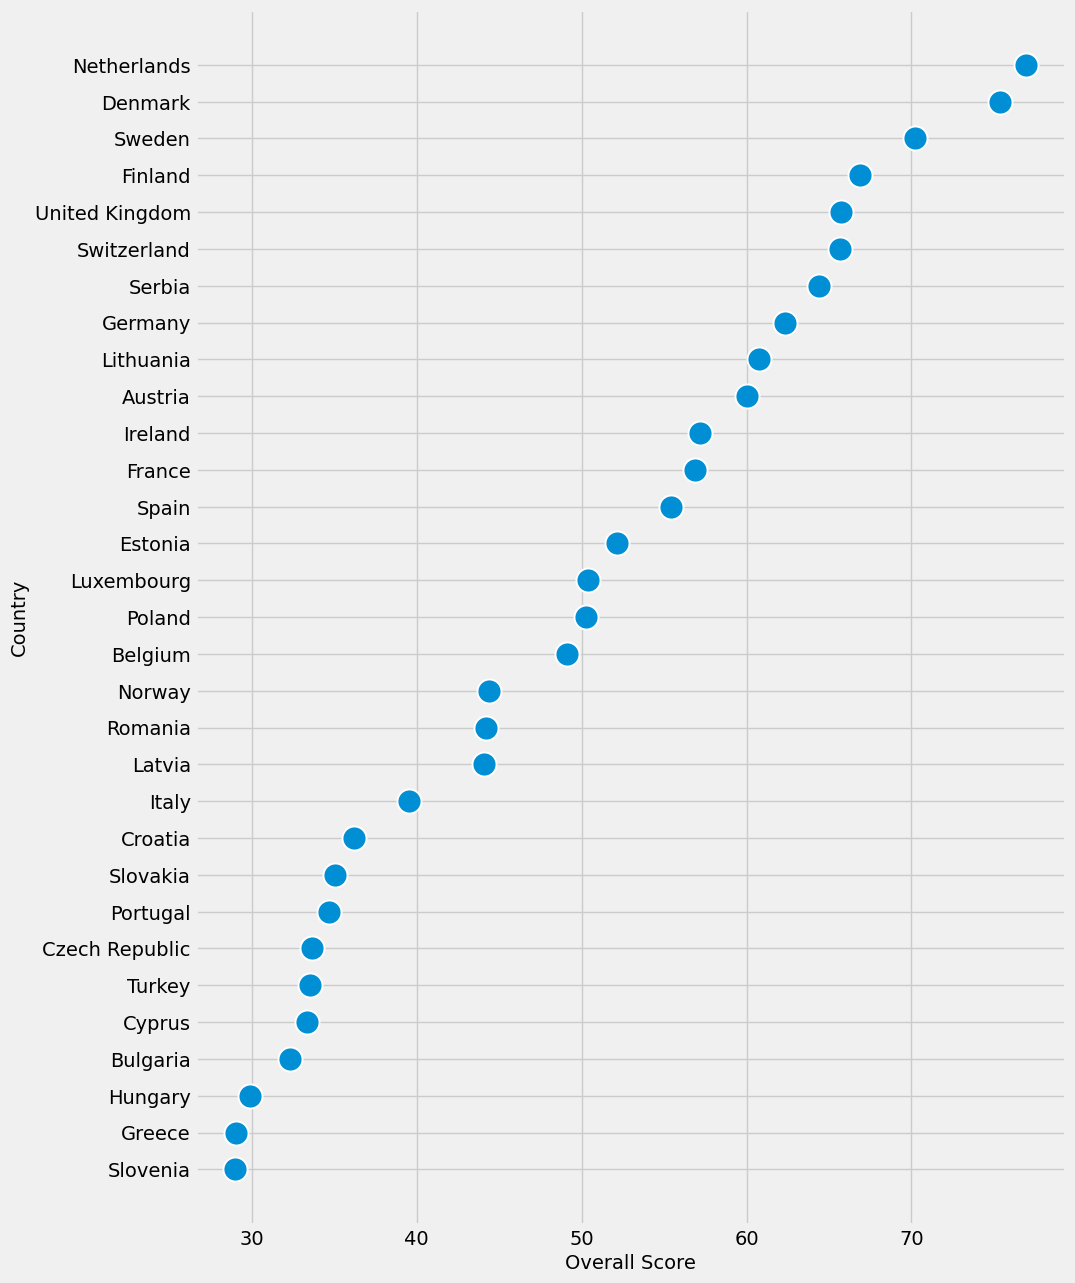

,Overall Score
Country,
Netherlands,76.95
Denmark,75.38
Sweden,70.20
Finland,66.88
United Kingdom,65.75
Switzerland,65.66
Serbia,64.38
Germany,62.33
Lithuania,60.77


None


In [55]:
for i in range(len(rw_categories.columns)):
    try:
        rank_n_chart(rw_categories, i+1)
    except IndexError:
        pass

### Radar Chart

- show top 5 and bottom 5 as separate charts
- use function to allow for more configurability

In [56]:
def radar_chart(df, x_col, y_col, order, num=5):
    """Build a radar chart with plotly with categorical x values and continuous y values.
        Defaults to top 5 and bottom 5 in a df sorted by your y_col. Set order to 1 or 2.
        Be sure to import plotly.graph objects as go at the start of your script."""
    
    fig = go.Figure()
    df = df.sort_values(by=y_col, ascending=False)
    attributes = df.columns[1:-1]
    attributes = [*attributes, attributes[0]]

    transposed = df.round(2).transpose() # Transpose df to allow easier radar chart formatting
    transposed.columns = df[x_col]
    transposed = transposed.iloc[1:-1,:] # Remove overall score (last col) and country (assigned to col name instead)
    
    # Filter your top and bottom x values here
    if order == 1:
        order = transposed.iloc[:,:num] # assigns to top num
    elif order == 2:    
        order = transposed.iloc[:,-num:] # assigns to bottom num
    else:
        print("Type 1 or 2 as your fourth argument.")

    # If needing two separate charts rearraange top and botttom, comment out second fig.show()
    for col in order.columns:
        col_val = order[col].values.tolist()
        col_val = [*col_val, col_val[0]] # reinsert first value so radar chart 'closes'
        # print(col_val)

        fig.add_trace(go.Scatterpolar(
            r=col_val,
            theta=attributes,
            #fill='toself',
            name=col
        ))
    
    # Tinker with chart size here
    # See if we can set color scheme
    fig.update_layout(
        autosize=False,
        width=1200,
        height=600,
        polar=dict(
            radialaxis=dict(
                visible=True
        )),
    )
    showlegend=True
    
    # Will show combined radar 
    fig.show()

In [57]:
# Top 5
top_5 = radar_chart(rw_categories,"Country", "Overall Score", 1, 5)


In [58]:
# Bottom 5
bottom_5 = radar_chart(rw_categories,"Country", "Overall Score", 2, 5)

### Europe Heatmap

Use Choropleth Maps
- look up further customization options
- find way to lock map zoom/pan

In [64]:
def heatmap(df, index, subcategory, coverage="europe"):
    """ Make heatmap on all subcategories. """

    fig = px.choropleth(df, locations=index, 
                    color=subcategory, locationmode="country names",
                     scope="europe")
    fig.update_layout(
        autosize=False,
        dragmode=False,
        width=900,
        height=800
    )

    fig.show()

In [65]:
for col in rw_categories.columns[1:]:
    try:
        heatmap(rw_categories, "Country", col, coverage="europe")
    except:
        pass